In [1]:
from tensorflow.keras.datasets import cifar10

# Import this PyPlot to visualize images
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from sklearn.utils import shuffle

# Load dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 23s 0us/step


In [2]:
# Print the shapes of training and testing set
print("X_train.shape =", X_train.shape, "Y_train.shape =", Y_train.shape)
print("X_test.shape =", X_test.shape, "Y_test.shape =", Y_test.shape)

X_train.shape = (50000, 32, 32, 3) Y_train.shape = (50000, 1)
X_test.shape = (10000, 32, 32, 3) Y_test.shape = (10000, 1)


In [3]:
NUM_CLASSES = 10
CIFAR10_CLASSES = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

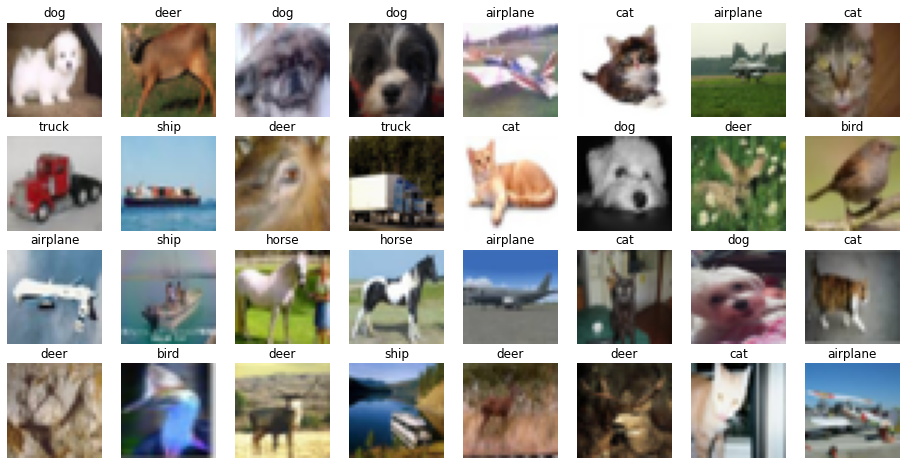

In [4]:
cols = 8 # Number of columns
rows = 4 # Number of rows

fig = plt.figure(figsize=(2 * cols, 2 * rows))

# Add subplot for each random image
for col in range(cols):
    for row in range(rows):
        random_index = np.random.randint(0, len(Y_train)) # Pick a random index for sampling the image
        ax = fig.add_subplot(rows, cols, col * rows + row + 1) # Add a sub-plot at (row, col)
        ax.grid(b=False) # Get rid of the grids
        ax.axis("off") # Get rid of the axis
        ax.imshow(X_train[random_index, :]) # Show random image
        ax.set_title(CIFAR10_CLASSES[Y_train[random_index][0]]) # Set title of the sub-plot

In [5]:
import tensorflow as tf
import numpy as np
print("TensorFlow's version is", tf.__version__)
print("Keras' version is", tf.keras.__version__)

TensorFlow's version is 2.2.0
Keras' version is 2.3.0-tf


In [6]:
X_train_normalized = X_train / 255 - 0.5
X_test_normalized = X_test / 255 - 0.5
Y_train_coded = tf.keras.utils.to_categorical(Y_train, NUM_CLASSES)
Y_test_coded = tf.keras.utils.to_categorical(Y_test, NUM_CLASSES)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.layers import LeakyReLU

def make_model():
    """
    Define your model architecture here.
    Returns `Sequential` model.
    """
    
    model = Sequential()
    
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(LeakyReLU(0.1))
    
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    
    model.add(MaxPooling2D())
    
    model.add(Dropout(rate=0.25))
    
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    
    model.add(MaxPooling2D())
    
    model.add(Dropout(rate=0.25))
    
    model.add(Flatten())
    
    model.add(Dense(units=256))
    model.add(LeakyReLU(0.1))
    
    model.add(Dropout(rate=0.5))
    
    model.add(Dense(units=10))
    model.add(Activation("softmax"))
    
    return model

In [9]:
s = tf.keras.backend.clear_session()
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9

In [12]:
INIT_LR = 5e-3  # initial learning rate
BATCH_SIZE = 64
EPOCHS = 20

s = tf.keras.backend.clear_session()  # clear default graph
# don't call K.set_learning_phase() !!! (otherwise will enable dropout in train/test simultaneously)
model = make_model()  # define our model

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=tf.keras.optimizers.Adamax(lr=INIT_LR),  # for SGD
    metrics=['accuracy']  # report accuracy during training
)

In [11]:
def lr_scheduler(epoch):
    return INIT_LR * 0.9 ** epoch
class LrHistory(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        print("Learning rate:", tf.keras.backend.get_value(model.optimizer.lr))

In [13]:
history = model.fit(
    X_train_normalized, Y_train_coded,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_scheduler), 
               LrHistory()],
    validation_data=(X_test_normalized, Y_test_coded),
    shuffle=True,
    verbose=1,
    initial_epoch=0
)

Learning rate: 0.005
Epoch 1/20
782/782 [==============================] - 69s 88ms/step - loss: 1.4137 - accuracy: 0.4875 - val_loss: 1.0505 - val_accuracy: 0.6286 - lr: 0.0050
Learning rate: 0.0045
Epoch 2/20
782/782 [==============================] - 68s 87ms/step - loss: 1.0027 - accuracy: 0.6482 - val_loss: 0.8434 - val_accuracy: 0.7046 - lr: 0.0045
Learning rate: 0.00405
Epoch 3/20
782/782 [==============================] - 68s 87ms/step - loss: 0.8508 - accuracy: 0.7013 - val_loss: 0.7781 - val_accuracy: 0.7291 - lr: 0.0041
Learning rate: 0.003645
Epoch 4/20
782/782 [==============================] - 68s 87ms/step - loss: 0.7558 - accuracy: 0.7342 - val_loss: 0.7408 - val_accuracy: 0.7474 - lr: 0.0036
Learning rate: 0.0032805
Epoch 5/20
782/782 [==============================] - 68s 87ms/step - loss: 0.6828 - accuracy: 0.7592 - val_loss: 0.6707 - val_accuracy: 0.7749 - lr: 0.0033
Learning rate: 0.00295245
Epoch 6/20
782/782 [==============================] - 68s 86ms/step - loss

In [14]:
def save_model(model):# serialize model to JSON
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("model.h5")
    print("Saved model to disk")


save_model(model)

Saved model to disk


In [15]:
def load_model():
    from tensorflow.keras.models import model_from_json
    
    # load json and create model
    json_file = open('model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("model.h5")
    print("Loaded model from disk")
    
    return loaded_model

model = load_model()

Loaded model from disk


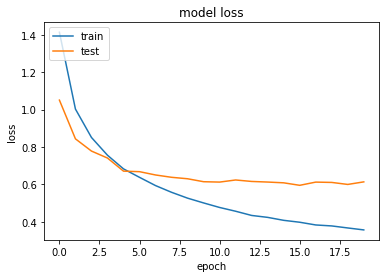

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
Y_pred_test = model.predict_proba(X_test_normalized) # Predict probability of image belonging to a class, for each class
Y_pred_test_classes = np.argmax(Y_pred_test, axis=1) # Class with highest probability from predicted probabilities
Y_test_classes = np.argmax(Y_test_coded, axis=1) # Actual class
Y_pred_test_max_probas = np.max(Y_pred_test, axis=1) # Highest probability

Instructions for updating:
Please use `model.predict()` instead.


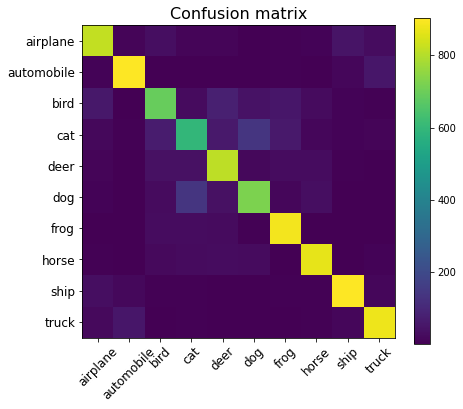

Test accuracy: 0.8084


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(Y_test_classes, Y_pred_test_classes))
plt.xticks(np.arange(10), CIFAR10_CLASSES, rotation=45, fontsize=12)
plt.yticks(np.arange(10), CIFAR10_CLASSES, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(Y_test_classes, Y_pred_test_classes))